In [8]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import seaborn as sns # visualizing the dataset

In [9]:
data=pd.read_csv('D:\Housing.csv')
data.head()

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
0,13300000,7420,4,2,3,yes,no,no,no,yes,2,yes,furnished
1,12250000,8960,4,4,4,yes,no,no,no,yes,3,no,furnished
2,12250000,9960,3,2,2,yes,no,yes,no,no,2,yes,semi-furnished
3,12215000,7500,4,2,2,yes,no,yes,no,yes,3,yes,furnished
4,11410000,7420,4,1,2,yes,yes,yes,no,yes,2,no,furnished


In [10]:
#For simple regression problem practice, only taking price & area columns.
practice_data = data[['price', 'area']].copy()
practice_data.head()

,price,area
0,13300000,7420
1,12250000,8960
2,12250000,9960
3,12215000,7500
4,11410000,7420


In [11]:
practice_data.shape

(545, 2)

In [12]:
practice_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 545 entries, 0 to 544
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype
---  ------  --------------  -----
 0   price   545 non-null    int64
 1   area    545 non-null    int64
dtypes: int64(2)
memory usage: 8.6 KB


<Axes: xlabel='area', ylabel='price'>

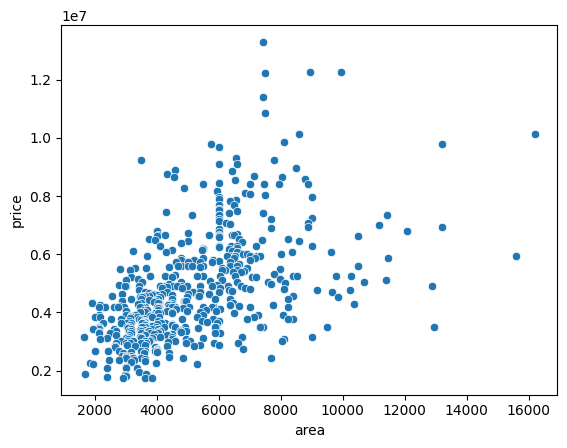

In [13]:
#Visualize the Dataset
#Visualizing the dataset using a scatter plot to visually check the linearity
sns.scatterplot(data=practice_data, x="area", y="price")

#This graph implies a moderate linear relationship between area and price, making linear regression a reasonable baseline model.

In [14]:
#Building the Model

# For the input variables
X = practice_data[['area']]
X

,area
0,7420
1,8960
2,9960
3,7500
4,7420
...,...
540,3000
541,2400
542,3620
543,2910


In [15]:
# For the target variable
y = practice_data['price']
y

0      13300000
1      12250000
2      12250000
3      12215000
4      11410000
         ...   
540     1820000
541     1767150
542     1750000
543     1750000
544     1750000
Name: price, Length: 545, dtype: int64

In [16]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=2)

print("Shape of Independent Variable Training Set: ", X_train.shape)
print("Shape of Dependent Variable Training Set: ", y_train.shape)

print("Shape of Independent Variable Testing Set: ", X_test.shape)
print("Shape of Dependent Variable Testing Set: ", y_test.shape)

Shape of Independent Variable Training Set:  (436, 1)
Shape of Dependent Variable Training Set:  (436,)
Shape of Independent Variable Testing Set:  (109, 1)
Shape of Dependent Variable Testing Set:  (109,)


In [17]:
#Building a linear model for simple linear regression
from sklearn.linear_model import LinearRegression

# Creating an object of the Linear Regression Class
lr = LinearRegression()

In [18]:
# Training the model using the train set
lr.fit(X_train, y_train)

,fit_intercept,True
,copy_X,True
,tol,1e-06
,n_jobs,None
,positive,False


In [19]:
# Checking for the intercept and coefficient
print("Intercept value (b): ", lr.intercept_)
print("Coefficient value (m): ", lr.coef_)

#Interpretation

#Intercept

#When no square feet area is mentioned, then the predicted price is almost 2275798. Although a house with zero square feet is not realistic, the intercept serves as a baseline value that captures the underlying price level not explained by area alone, such as location, land value, or fixed costs.

#Coefficient

#For every 1 unit additional area, the house price increases by 480 on average.

Intercept value (b):  2275798.1033433774
Coefficient value (m):  [480.09264702]


In [20]:
# Making the prediction
y_pred = lr.predict(X_test)
y_pred[:5]

array([3716076.04441468, 4080946.45615274, 4162562.20614678,
       4023335.33850989, 5204363.25018835])

In [21]:
y_test[:5]

333    3920000
84     6510000
439    3255000
396    3500000
161    5460000
Name: price, dtype: int64

In [22]:
# Evaluating the model using regression metrics
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

print("MAE",mean_absolute_error(y_test,y_pred))
print("MSE",mean_squared_error(y_test,y_pred))
print("R2 score",r2_score(y_test,y_pred))

#This is a simple linear regression using only area. The low R² indicates that while area has a positive relationship with price, it is insufficient to explain housing prices on its own.

MAE 1181677.5017588872
MSE 2764797555900.765
R2 score 0.22098086489160718
